# Proyecto 03 - Sistemas de Recomendación

Implementación de un Sistema de Recomendación para videojuegos de la plataforma Steam.
El dataset de STEAM se puede descargar desde aquí. Son dos archivos, uno de calificaciones y otro de información sobre los juegos.

Este proyecto se puede encontrar en mi git https://github.com/nicosalasaraoz



## Filtro Colaborativo para un sistema de recomendación de juegos
En este proyecto veremos cómo se pueden aprovechar los sistemas de recomendación para sugerir juegos. Para hacer esto, usaremos un gran conjunto de datos de revisiones de Steam.

- Tipos de datos: elige tipos de datos apropiados para cada columna.

- Descartar columnas poco informativas.

- Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

Exploración de datos:
- Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?


Filtro Colaborativo
Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

- Haz todas las transformaciones de datos que consideres necesarias. Justifica.
- Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
- Elige un modelo benchmark y compara tus resultados con este modelo.
- Optimiza los hiperparámetros de tu modelo.
- Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, independientemente de si la crítica es buena o mala.

Para pensar, investigar y, opcionalmente, implementar
¿Cómo harías para ponerle un valor a la calificación?
¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
¿Hay algo que te gustaría investigar o probar?

# Parte A - Exploración de Datos.

## Importamos librerias:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando el dataset con las Reviews de los juegos

In [ ]:
# Funcion para descomprimir archivos
#import gzip
#import pandas as pd

#def parse(path):
#    g = gzip.open(path, 'r')
#    for l in g:
#        yield eval(l)

#contador = 0
#data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
#n = 10
#for l in parse('steam_reviews.json.gz'):
#    if contador%n == 0:
#        data_reviews.append(l)
#    else:
#        pass
#    contador += 1

#data_reviews = pd.DataFrame(data_reviews)

#if True:
#    data_reviews.to_csv('data_reviews.csv', index= False)

Descripcion de las features de steam_reviews:

* username: nombre de usuario;
* hours: número de horas que el usuario jugó al juego;
* products: juego;
* product_id: id del juego;
* page_order: orden de la pagina que aparece el juego;
* date: fecha de la reseña;
* text: contenido de la reseña;
* early_access: acceso temprano;
* page: la página en la que aparece la reseña;
* user_id: identificador único de usuario;
* compensation: productos recibidos gratuitamente;
* found_funny: número de usuarios que encontraron divertida la reseña.


In [ ]:
# Importamos el dataset de data reviews
data_reviews = pd.read_csv('/content/drive/MyDrive/data science/sprint project 3/data_reviews.csv')

In [ ]:
# Visualizamos el head
data_reviews.head(2)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,NaN,NaN


In [ ]:
# Tail del dataset
data_reviews.tail(2)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
779305,Jerry,139.8,79.0,252490,1,2013-12-11,Great game!,True,10220,7.656120e+16,NaN,NaN
779306,Helk,15375.0,98.0,252490,1,2013-12-11,I love this game!,True,10221,NaN,NaN,36.0


In [ ]:
# Cantidad de filas y columnas
data_reviews.shape

(779307, 12)

In [ ]:
# Informacion del dataset
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779307 entries, 0 to 779306
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   username      779289 non-null  object 
 1   hours         776670 non-null  float64
 2   products      777741 non-null  float64
 3   product_id    779307 non-null  int64  
 4   page_order    779307 non-null  int64  
 5   date          779307 non-null  object 
 6   text          777468 non-null  object 
 7   early_access  779307 non-null  bool   
 8   page          779307 non-null  int64  
 9   user_id       317340 non-null  float64
 10  compensation  14588 non-null   object 
 11  found_funny   120164 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(4)
memory usage: 66.1+ MB


In [ ]:
data_reviews.columns

Index(['username', 'hours', 'products', 'product_id', 'page_order', 'date',
       'text', 'early_access', 'page', 'user_id', 'compensation',
       'found_funny'],
      dtype='object')

In [ ]:
# Visualizamos la cantidad de reviews por usuario
data_reviews.username.value_counts()

123              213
Alex             190
Chris            155
Nick             143
Matt             137
                ... 
Hotcake Jack       1
FlygN              1
6footgeek          1
Barfight Hero      1
Catwalk Lady       1
Name: username, Length: 540338, dtype: int64

In [ ]:
# Conteo de la cantidad de observaciones por cada feature.
data_reviews.nunique()

username        540338
hours            21762
products          3926
product_id       12665
page_order          10
date              2617
text            718776
early_access         2
page             18368
user_id         259975
compensation         1
found_funny        634
dtype: int64

In [ ]:
# Usuarios unicos
len(data_reviews.user_id)

779307

In [ ]:
# Suma de los valores NAN del dataset.
data_reviews.isna().sum()

username            18
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text              1839
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

In [ ]:
# Descripcion estadistica del dataset
data_reviews.describe()

,hours,products,product_id,page_order,page,user_id,found_funny
count,776670.000000,777741.000000,779307.000000,779307.000000,779307.000000,3.173400e+05,120164.000000
mean,111.843832,236.993936,251489.822053,4.417743,893.581355,7.656120e+16,7.713125
std,390.145376,486.034479,149975.370469,2.897848,1928.272966,1.007694e+08,72.465816
min,0.000000,1.000000,10.000000,0.000000,1.000000,7.656120e+16,1.000000
25%,4.000000,45.000000,203770.000000,2.000000,53.000000,7.656120e+16,1.000000
50%,15.300000,110.000000,252490.000000,4.000000,238.000000,7.656120e+16,1.000000
75%,59.600000,246.000000,346110.000000,7.000000,829.000000,7.656120e+16,3.000000
max,28164.000000,13540.000000,773900.000000,9.000000,18371.000000,7.656120e+16,6524.000000


In [ ]:
# Eliminamos las columnas de los datasets que no aportan informacion
data_reviews = data_reviews.drop(columns=['products', 'page_order','text', 'early_access', 'page', 'compensation','found_funny','user_id'])

In [ ]:
data_reviews

,username,hours,product_id,date
0,Chaos Syren,0.1,725280,2017-12-17
1,Ariman1,13.2,328100,2017-08-02
2,freakfantom,0.1,725280,2017-11-12
3,The_Cpt_FROGGY,7.8,631920,2017-12-11
4,the_maker988,8.2,35140,2018-01-02
...,...,...,...,...
779302,Vidaar,783.5,252490,2013-12-11
779303,Nikolai Belinski,55.1,252490,2013-12-11
779304,RancorZealot,203.5,252490,2013-12-11
779305,Jerry,139.8,252490,2013-12-11


## Importando el dataset con los datos de cada juego

In [ ]:
# data_games = []
# for l in parse('steam_games.json.gz'):
#     data_games.append(l)
# data_games = pd.DataFrame(data_games)

# if True:
#     data_games.to_csv('data_games.csv', index= False)

In [ ]:
# Importamos el dataset data games
data_games = pd.read_csv('/content/drive/MyDrive/data science/sprint project 3/data_games.csv')

Descripcion de las features de steam_games:

* publisher: empresa editor que publicó el juego;
* genres: genero del juego, por ejemplo aventura,accion;
* app_name: nombre de la aplicación correspondiente al juego;
* title: titulo del juego;
* url: link al juego;
* release_date: fecha de lanzamiento;
* tags: etiquetas del juego, genero / si es gratuito o no;
* discount_price: precio con descuento y monto;
* reviews_url: url a las reseñas del juego;
* specs: caracteristicas del juego, single, multi, online etc;
* price: precio;
* early_access: acceso mientras el juego evoluciona;
* id: id numerico del juego;
* developer: compañia que desarrollo el juego;
* sentiment: sentimiento general del juego;
* metascore: puntuación general de usuario del juego.

In [ ]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN,NaN,NaN


In [ ]:
data_games.tail()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
32130,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",1.49,http://steamcommunity.com/app/773640/reviews/?...,"['Single-player', 'Steam Achievements']",1.99,False,773640.0,"Nikita ""Ghost_RUS""",NaN,NaN
32131,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"['Strategy', 'Indie', 'Casual']",4.24,http://steamcommunity.com/app/733530/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,733530.0,Sacada,NaN,NaN
32132,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",1.39,http://steamcommunity.com/app/610660/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660.0,Laush Dmitriy Sergeevich,NaN,NaN
32133,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",NaN,http://steamcommunity.com/app/658870/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,658870.0,"xropi,stev3ns",1 user reviews,NaN
32134,NaN,NaN,Maze Run VR,NaN,http://store.steampowered.com/app/681550/Maze_...,NaN,"['Early Access', 'Adventure', 'Indie', 'Action...",NaN,http://steamcommunity.com/app/681550/reviews/?...,"['Single-player', 'Stats', 'Steam Leaderboards...",4.99,True,681550.0,NaN,Positive,NaN


In [ ]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24073 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  bool   
 12  id              32133 non-null  float64
 13  developer       28836 non-null  object 
 14  sentiment       24953 non-null  object 
 15  metascore       2607 non-null   float64
dtypes: bool(1), float64(3), object(12)
memory usage: 3.7+ MB


In [ ]:
data_games.shape

(32135, 16)

In [ ]:
data_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'discount_price', 'reviews_url', 'specs', 'price',
       'early_access', 'id', 'developer', 'sentiment', 'metascore'],
      dtype='object')

In [ ]:
# Visualizamos los valores NAN del dataset
data_games.isna().sum()

publisher          8062
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29528
dtype: int64

Descartando columnas poco informativas.

In [ ]:
# Eliminamos las columnas del dataset que no aportan informacion
data_games = data_games.drop(columns=['url', 'discount_price', 'reviews_url','specs','early_access'])

In [ ]:
data_games

,publisher,genres,app_name,title,release_date,tags,price,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.99,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",Free To Play,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",Free to Play,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,2017-12-07,"['Action', 'Adventure', 'Casual']",0.99,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,NaN,"['Action', 'Indie', 'Casual', 'Sports']",2.99,773570.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",1.99,773640.0,"Nikita ""Ghost_RUS""",NaN,NaN
32131,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,2018-01-04,"['Strategy', 'Indie', 'Casual']",4.99,733530.0,Sacada,NaN,NaN
32132,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,2018-01-04,"['Indie', 'Simulation', 'Racing']",1.99,610660.0,Laush Dmitriy Sergeevich,NaN,NaN
32133,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,EXIT 2 - Directions,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",4.99,658870.0,"xropi,stev3ns",1 user reviews,NaN


## Procedemos a unir los datasets

In [ ]:
df =pd.merge(data_reviews,data_games, how ='inner', left_on = "product_id", right_on = "id")
df.drop('id', axis=1, inplace=True)

In [ ]:
df.head()

,username,hours,product_id,date,publisher,genres,app_name,title,release_date,tags,price,developer,sentiment,metascore
0,Chaos Syren,0.1,725280,2017-12-17,Vyacheslav Shilikhin,"['Action', 'Adventure', 'Indie', 'Simulation']",Psi Project,Psi Project,2017-11-10,"['Action', 'Adventure', 'Indie', 'Simulation']",2.99,Vyacheslav Shilikhin,Positive,NaN
1,freakfantom,0.1,725280,2017-11-12,Vyacheslav Shilikhin,"['Action', 'Adventure', 'Indie', 'Simulation']",Psi Project,Psi Project,2017-11-10,"['Action', 'Adventure', 'Indie', 'Simulation']",2.99,Vyacheslav Shilikhin,Positive,NaN
2,Ariman1,13.2,328100,2017-08-02,KISS ltd,"['Adventure', 'Indie', 'RPG']",Gunspell - Steam Edition,Gunspell - Steam Edition,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",14.99,Ino-Co Plus,Mixed,NaN
3,dll3z,0.4,328100,2017-03-07,KISS ltd,"['Adventure', 'Indie', 'RPG']",Gunspell - Steam Edition,Gunspell - Steam Edition,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",14.99,Ino-Co Plus,Mixed,NaN
4,Nyazicat,2.2,328100,2017-01-09,KISS ltd,"['Adventure', 'Indie', 'RPG']",Gunspell - Steam Edition,Gunspell - Steam Edition,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",14.99,Ino-Co Plus,Mixed,NaN


In [ ]:
# Guardamos el dataset unico
#if True:
#    df.to_csv('/content/drive/MyDrive/data science/sprint project 3/df.csv', index= False)

## Dataset procesado

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos el dataframe
df = pd.read_csv('/content/drive/MyDrive/data science/sprint project 3/df.csv')

In [ ]:
# Visualizamos las 5 primeras lineas 
df.head()

,username,hours,product_id,date,publisher,genres,app_name,title,release_date,tags,price,developer,sentiment,metascore
0,Chaos Syren,0.1,725280,2017-12-17,Vyacheslav Shilikhin,"['Action', 'Adventure', 'Indie', 'Simulation']",Psi Project,Psi Project,2017-11-10,"['Action', 'Adventure', 'Indie', 'Simulation']",2.99,Vyacheslav Shilikhin,Positive,NaN
1,freakfantom,0.1,725280,2017-11-12,Vyacheslav Shilikhin,"['Action', 'Adventure', 'Indie', 'Simulation']",Psi Project,Psi Project,2017-11-10,"['Action', 'Adventure', 'Indie', 'Simulation']",2.99,Vyacheslav Shilikhin,Positive,NaN
2,Ariman1,13.2,328100,2017-08-02,KISS ltd,"['Adventure', 'Indie', 'RPG']",Gunspell - Steam Edition,Gunspell - Steam Edition,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",14.99,Ino-Co Plus,Mixed,NaN
3,dll3z,0.4,328100,2017-03-07,KISS ltd,"['Adventure', 'Indie', 'RPG']",Gunspell - Steam Edition,Gunspell - Steam Edition,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",14.99,Ino-Co Plus,Mixed,NaN
4,Nyazicat,2.2,328100,2017-01-09,KISS ltd,"['Adventure', 'Indie', 'RPG']",Gunspell - Steam Edition,Gunspell - Steam Edition,2014-11-07,"['Adventure', 'RPG', 'Indie', 'Puzzle', 'Match...",14.99,Ino-Co Plus,Mixed,NaN


In [ ]:
# Informacion sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779951 entries, 0 to 779950
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   username      779933 non-null  object 
 1   hours         777314 non-null  float64
 2   product_id    779951 non-null  int64  
 3   date          779951 non-null  object 
 4   publisher     770295 non-null  object 
 5   genres        775928 non-null  object 
 6   app_name      779951 non-null  object 
 7   title         779951 non-null  object 
 8   release_date  778840 non-null  object 
 9   tags          779947 non-null  object 
 10  price         773278 non-null  object 
 11  developer     774163 non-null  object 
 12  sentiment     779807 non-null  object 
 13  metascore     458307 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 83.3+ MB


In [ ]:
# Features
df.columns

Index(['username', 'hours', 'product_id', 'date', 'publisher', 'genres',
       'app_name', 'title', 'release_date', 'tags', 'price', 'developer',
       'sentiment', 'metascore'],
      dtype='object')

In [ ]:
# Forma del dataset, 14 features y 779951 Instancias
df.shape

(779951, 14)

In [ ]:
# Descripcion estadistica de las variables numericas
df.describe()

,hours,product_id,metascore
count,777314.000000,779951.000000,458307.000000
mean,111.765730,251788.219356,79.767056
std,389.993556,150272.381645,9.730428
min,0.000000,10.000000,20.000000
25%,4.000000,203770.000000,74.000000
50%,15.300000,252490.000000,81.000000
75%,59.500000,346330.000000,87.000000
max,28164.000000,773900.000000,96.000000


In [ ]:
# Agrupamos por sentimientos calificados a cada juego por los usuarios. Visualizamos muchas calificaciones positivas
df.groupby(['sentiment'])['username'].count()

sentiment
1 user reviews                187
2 user reviews                290
3 user reviews                284
4 user reviews                367
5 user reviews                345
6 user reviews                388
7 user reviews                317
8 user reviews                367
9 user reviews                318
Mixed                      120781
Mostly Negative              8352
Mostly Positive            108489
Negative                      317
Overwhelmingly Negative       675
Overwhelmingly Positive    148202
Positive                     4512
Very Negative                 347
Very Positive              385251
Name: username, dtype: int64

In [ ]:
# Cantidad de Usuarios unicos
df.username.nunique()

540338

In [ ]:
# Juegos que califico cada usuario
juegos_user = df.username.value_counts()
juegos_user

123                     213
Alex                    190
Chris                   156
Nick                    143
Matt                    139
                       ... 
Thundershots              1
1111                      1
✦ K I A M                 1
Danny | csgonerf.com      1
Catwalk Lady              1
Name: username, Length: 540338, dtype: int64

In [ ]:
# Agrupamos los usuarios 
df_by_users=df.groupby(['username']).count()
df_by_users

,hours,product_id,date,publisher,genres,app_name,title,release_date,tags,price,developer,sentiment,metascore
username,,,,,,,,,,,,,
!,1,1,1,1,1,1,1,1,1,1,1,1,1
! ZerZ,2,2,2,2,2,2,2,2,2,2,2,2,2
! ! ŦŕĩŽǿЯëќ™ ! !,1,1,1,1,1,1,1,1,1,1,1,1,1
! Alga,2,2,2,2,2,2,2,2,2,2,2,2,2
! DeadlyDeal !,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
󰀓Heavy Unit󰀓,1,1,1,1,1,1,1,1,1,1,1,1,0
󰀓Oxymoronicphalanx󰀓,2,2,2,2,2,2,2,2,2,2,2,2,0
󰀕 Africa's Population 󰀕,2,2,2,1,2,2,2,2,2,2,2,2,2


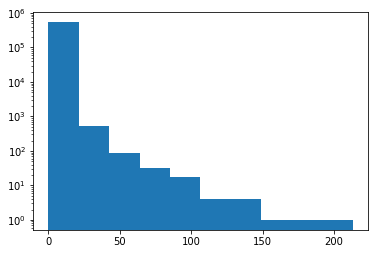

In [ ]:
# Grafica de histograma de la cantidad de horas y cantidad de usuarios.
plt.hist(df_by_users.hours, log= True)
plt.show()

Pocos usuarios son los que jugaron muchas horas

In [ ]:
#garbage collector
import gc 
gc.collect()

12738

## Tipos de datos

In [ ]:
# Eliminamos los valores nulos de las columas metascore y hours.
df = df.dropna()
df.shape

(449486, 14)

In [ ]:
# Procedemos a cambiar el tipo de variable a fin convertir a tipos de datos que ocupen menos lugar.
#df['hours'] = df['hours'].astype(np.int8)
#df['product_id'] = df['product_id'].astype(np.int8)
#df['metascore'] = df['metascore'].astype(np.int8)

In [ ]:
# Informacion sobre el dataset procesado
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449486 entries, 12 to 779548
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   username      449486 non-null  object 
 1   hours         449486 non-null  float64
 2   product_id    449486 non-null  int64  
 3   date          449486 non-null  object 
 4   publisher     449486 non-null  object 
 5   genres        449486 non-null  object 
 6   app_name      449486 non-null  object 
 7   title         449486 non-null  object 
 8   release_date  449486 non-null  object 
 9   tags          449486 non-null  object 
 10  price         449486 non-null  object 
 11  developer     449486 non-null  object 
 12  sentiment     449486 non-null  object 
 13  metascore     449486 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 51.4+ MB


In [ ]:
# Visualizamos los nulos del dataset
df.isna().sum()

username        0
hours           0
product_id      0
date            0
publisher       0
genres          0
app_name        0
title           0
release_date    0
tags            0
price           0
developer       0
sentiment       0
metascore       0
dtype: int64

In [ ]:
# #Guardamos el dataset unico
# if True:
#     df.to_csv('/content/drive/MyDrive/data science/sprint project 3/df2.csv', index= False)

In [ ]:
# Importamos el dataset modificado
df2 = pd.read_csv('/content/drive/MyDrive/data science/sprint project 3/df2.csv')

In [ ]:
# Visualizando las 5 primeras instancias del dataset procesado
df2.head()

,username,hours,product_id,date,publisher,genres,app_name,title,release_date,tags,price,developer,sentiment,metascore
0,the_maker988,8,68,2018-01-02,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,2010-03-26,"['Action', 'Batman', 'Stealth', 'Adventure', '...",19.99,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91
1,MLGarbage,9,68,2018-01-02,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,2010-03-26,"['Action', 'Batman', 'Stealth', 'Adventure', '...",19.99,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91
2,Brookie,16,68,2017-12-31,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,2010-03-26,"['Action', 'Batman', 'Stealth', 'Adventure', '...",19.99,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91
3,anotherphysicsgradstudent,56,68,2017-12-31,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,2010-03-26,"['Action', 'Batman', 'Stealth', 'Adventure', '...",19.99,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91
4,BouncedBadger123,54,68,2017-12-29,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,2010-03-26,"['Action', 'Batman', 'Stealth', 'Adventure', '...",19.99,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


In [ ]:
# Forma del dataset
df2.shape

(457813, 14)

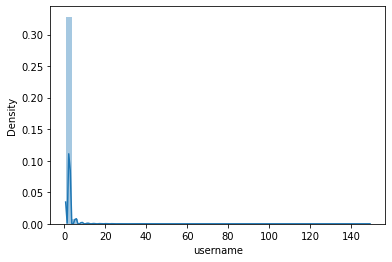

In [ ]:
# Grafica de Cantidad de veces que los Usuarios calificaron
sns.distplot(df2.username.value_counts())

Muy pocos usuarios calificaron los juegos

In [ ]:
# los 10 juegos mas calificados
for i in range(9):
  print(df2.app_name.value_counts().index[i])

Team Fortress 2
Borderlands 2
Fallout 4
Grand Theft Auto V
Undertale
Warframe
Portal 2
Starbound
ARK: Survival Evolved


In [ ]:
# los 10 juegos menos calificados
for i in range(9):
  print(df2.app_name.value_counts(ascending=True).index[i])

Konung 2
LUMINES™
Talent Not Included
Beachhead 2000
Elven Legacy: Ranger
Attentat 1942
Memento Mori 2
Hard to Be a God
Red Game Without A Great Name


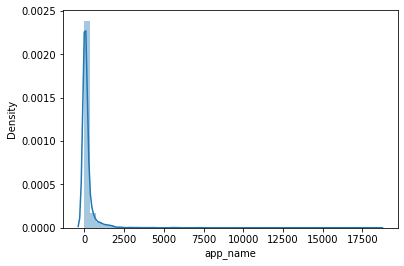

In [ ]:
# Grafica de cantidad de veces que los juegos fueron calificados
sns.distplot(df2.app_name.value_counts())

Pocos juegos fueron calificados

In [ ]:
# Cantidad de usuarios unicos
df2.username.nunique()

344506

In [ ]:
# Cantidad de juegos unicos
df2.app_name.nunique()

2389

In [ ]:
# Calificacion de los usuarios
df2.sentiment.value_counts()

Very Positive              245842
Overwhelmingly Positive    107929
Mixed                       52568
Mostly Positive             47564
Mostly Negative              2922
Positive                      510
Overwhelmingly Negative       318
Very Negative                  86
2 user reviews                 18
8 user reviews                 12
Negative                       11
7 user reviews                  9
9 user reviews                  9
5 user reviews                  6
4 user reviews                  5
6 user reviews                  4
Name: sentiment, dtype: int64

## Outliers

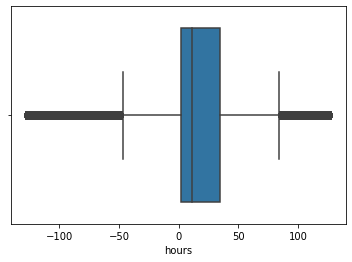

In [ ]:
# Graficamos con un boxplot a fin de visualizar los outliers
sns.boxplot(df2.hours)

In [ ]:
# Eliminamos los outliers de las horas jugadas
valor_medio = df2['hours'].mean()
std = df2['hours'].std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers = np.logical_or(df2['hours'] < minimo, df2['hours'] > maximo)
print(valor_medio, std, minimo, maximo)

16.041165279273415 44.596319745687964 -117.74779395779048 149.83012451633732


In [ ]:
# Sacamos los valores donde contienen horas negativas
df2 = df2[~mascara_outliers]
df2 = df2[df2.hours >=0]
df2['hours'].describe()

count    406538.000000
mean         27.249374
std          30.770908
min           0.000000
25%           5.000000
50%          15.000000
75%          39.000000
max         127.000000
Name: hours, dtype: float64

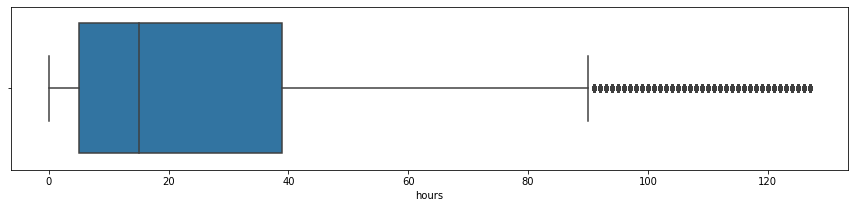

In [ ]:
# Grafica de caja de horas jugadas
plt.subplots(figsize=(15,3))
sns.boxplot(x=df2[~df2['hours'].isna()]['hours'])

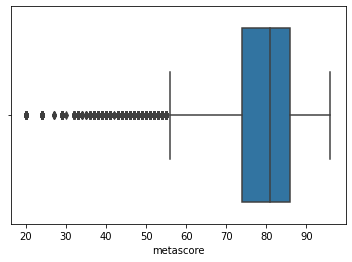

In [ ]:
# Graficamos el metascore
sns.boxplot(df2.metascore)

In [ ]:
# Reemplazamos los na por np.nan
df2.metascore = df2.metascore.replace(['NA'],np.nan)

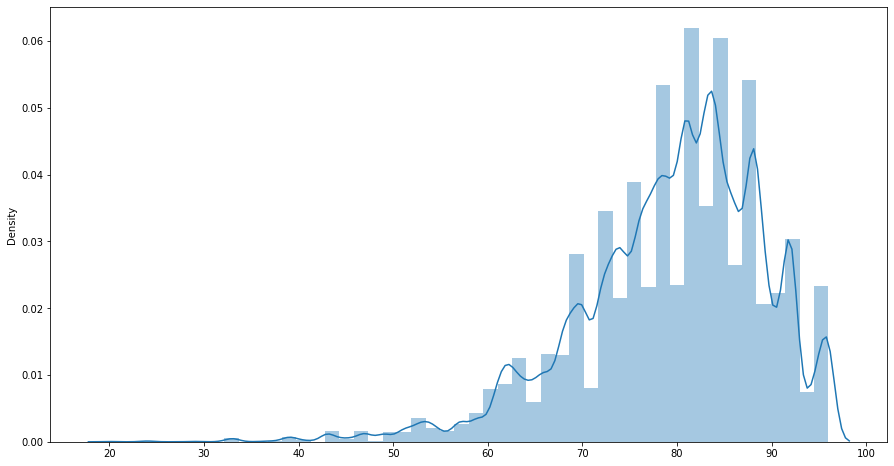

In [ ]:
# grafica de distribucion de metascore
plt.subplots(figsize=(15,8))
sns.distplot(df2.metascore.values)

In [ ]:
df2.metascore.describe()

count    406538.000000
mean         79.409246
std           9.808326
min          20.000000
25%          74.000000
50%          81.000000
75%          86.000000
max          96.000000
Name: metascore, dtype: float64

In [ ]:
# Precio de los juegos
df2.price

0         19.99
1         19.99
2         19.99
3         19.99
4         19.99
          ...  
457808     4.99
457809     4.99
457810     4.99
457811     4.99
457812     4.99
Name: price, Length: 406538, dtype: object

In [ ]:
# Convertimos a numericos los valores de feature price
df2.price = pd.to_numeric(df2.price, errors='coerce').fillna(0).astype(np.float64)

In [ ]:
df2.price

0         19.99
1         19.99
2         19.99
3         19.99
4         19.99
          ...  
457808     4.99
457809     4.99
457810     4.99
457811     4.99
457812     4.99
Name: price, Length: 406538, dtype: float64

In [ ]:
df2.describe()

,hours,product_id,price,metascore
count,406538.000000,406538.000000,406538.000000,406538.000000
mean,27.249374,0.874482,19.205695,79.409246
std,30.770908,72.601755,14.438087,9.808326
min,0.000000,-128.000000,0.000000,20.000000
25%,5.000000,-62.000000,9.990000,74.000000
50%,15.000000,-2.000000,16.990000,81.000000
75%,39.000000,64.000000,24.990000,86.000000
max,127.000000,126.000000,87.940000,96.000000


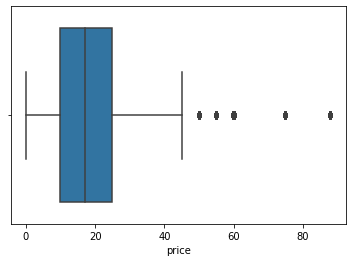

In [ ]:
# Grafica de caja de los precios
sns.boxplot(df2.price)

Text(0, 0.5, 'Frecuencia por bins')

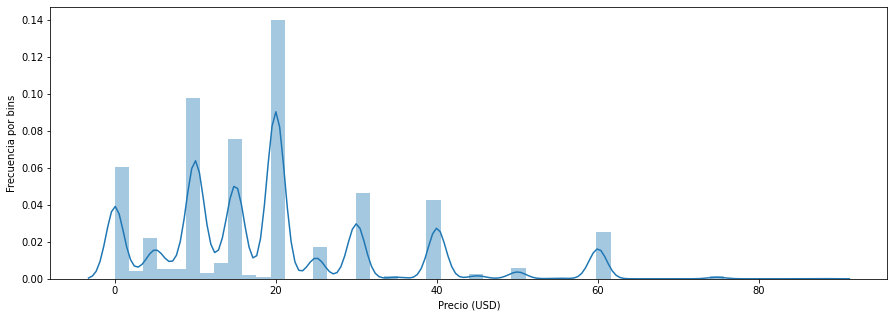

In [ ]:
# Grafica de precios de juegos
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df2.price)
ax.set_xlabel('Precio (USD)')
ax.set_ylabel('Frecuencia por bins')

In [ ]:
if True:
    df2.to_csv('/content/drive/MyDrive/data science/sprint project 3/df3.csv', index= False)

In [ ]:
# Importamos el dataset modificado
df3 = pd.read_csv('/content/drive/MyDrive/data science/sprint project 3/df3.csv')

In [ ]:
df3.head(5)

,username,hours,product_id,date,publisher,genres,app_name,title,release_date,tags,price,developer,sentiment,metascore
0,the_maker988,8,68,2018-01-02,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,2010-03-26,"['Action', 'Batman', 'Stealth', 'Adventure', '...",19.99,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91
1,MLGarbage,9,68,2018-01-02,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,2010-03-26,"['Action', 'Batman', 'Stealth', 'Adventure', '...",19.99,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91
2,Brookie,16,68,2017-12-31,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,2010-03-26,"['Action', 'Batman', 'Stealth', 'Adventure', '...",19.99,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91
3,anotherphysicsgradstudent,56,68,2017-12-31,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,2010-03-26,"['Action', 'Batman', 'Stealth', 'Adventure', '...",19.99,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91
4,BouncedBadger123,54,68,2017-12-29,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,2010-03-26,"['Action', 'Batman', 'Stealth', 'Adventure', '...",19.99,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


# Parte B - Modelo de Machine Learning
# Entrenamiento de modelos de sistema de recomendación

Para entrenar el sistema de recomendación vamos a usar la biblioteca Surprise. 
El objetivo del entrenamiento del modelo es desarrollar un algoritmo que pueda predecir el feature target (usualmente relacionado con el rating o calificación de satisfacción según usuarios) para usuarios e items (juegos) que no tengan un rating asignado a su respectiva combinación.

In [ ]:
# Importamos las librerias basicas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title
# Importamos el dataset modificado
df3 = pd.read_csv('/content/drive/MyDrive/data science/sprint project 3/df3.csv')

In [ ]:
# Importamos librerias
!pip install surprise

In [ ]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD

- El target a utilizar sera el feature metascore, ya que se asimila al rating de cada juego

In [ ]:
# La clase Reader se usa para analizar un archivo que contiene calificaciones. 
# Se supone que dicho archivo especifica solo una calificación por línea, 
# y cada línea debe respetar la siguiente estructura: user ; item ; rating ; [timestamp]
# Parametrizamos el modelo para que el rating se interprete como una cantidad que puede variar entre 1 y 100.

reader = Reader(rating_scale=(1, 100))

# Cargamos los datos según indica la librería Surprise, en el dataset "data"

data = Dataset.load_from_df(df3[['username', 'product_id', 'metascore']], reader)
data

In [ ]:
# Realizamos una separación de train y test del 25%

trainset, testset = train_test_split(data, test_size=.25)
print(trainset)

## Benchmark: SVD
Entrenaremos sin especificar parámetros un modelo de recomendación basado en el algoritmo de descomposición en valores singulares (SVD). 
- Este modelo no puede usarse para el enfoque como filtro colaborativo, ya que no mide las similitudes entre usuario pero nos servirá como benchmark.

In [ ]:
from surprise import SVD
algo = SVD()
algo.fit(trainset)

In [ ]:
predictions = algo.test(testset)
predictions[0]

Prediction(uid='foxpresident24', iid=-56, r_ui=88.0, est=82.75410285348325, details={'was_impossible': False})

La variable "predictions" contiene las predicciones para cada uno de los usuarios (user_id o uid) y desde ellos, para cada uno de los juegos (product_id o iid).
* El ID de usuario (sin formato): uid.
* El ID de artículo (sin procesar): iid.
* La verdadera calificación: r_ui .
* La calificación estimada: est .

In [ ]:
predictions[0:5]

[Prediction(uid='foxpresident24', iid=-56, r_ui=88.0, est=82.75410285348325, details={'was_impossible': False}),
 Prediction(uid='2B', iid=116, r_ui=80.0, est=87.24593805739065, details={'was_impossible': False}),
 Prediction(uid='Flintlock', iid=-30, r_ui=90.0, est=82.88533721549017, details={'was_impossible': False}),
 Prediction(uid='Face Full Of Festive Mann', iid=-84, r_ui=78.0, est=78.06568953480111, details={'was_impossible': False}),
 Prediction(uid='hindo', iid=84, r_ui=86.0, est=81.46027309197652, details={'was_impossible': False})]

In [ ]:
# Predecimos para un usuario y juego en particular, utilizando el metodo predict
algo.predict('Reloaded',52)

Prediction(uid='Reloaded', iid=52, r_ui=None, est=78.22894907791581, details={'was_impossible': False})

In [ ]:
# Ususario con mayor cantidad de reseñas
df3.username.value_counts()

123          105
Chris         92
Alex          86
Matt          80
John          75
            ... 
matt30060      1
Ashi           1
YogA           1
orhill2        1
Voffie         1
Name: username, Length: 307267, dtype: int64

In [ ]:
df3[df3.username=='123'].head(3)

,username,hours,product_id,date,publisher,genres,app_name,title,release_date,tags,price,developer,sentiment,metascore
2340,123,69,-26,2017-09-15,Rockstar Games,"['Action', 'Adventure']",Grand Theft Auto V,Grand Theft Auto V,2015-04-14,"['Open World', 'Action', 'Multiplayer', 'First...",39.99,Rockstar North,Mixed,96
6785,123,26,104,2016-10-07,"Square Enix, Feral Interactive (Linux), Feral ...","['Action', 'RPG']",Deus Ex: Mankind Divided,Deus Ex: Mankind Divided,2016-08-23,"['Cyberpunk', 'Stealth', 'Action', 'Sci-fi', '...",59.99,"Eidos Montreal,Feral Interactive (Linux),Feral...",Mixed,83
11684,123,34,-120,2017-12-29,Frozenbyte,"['Action', 'Adventure', 'Indie']",Trine 2: Complete Story,Trine 2: Complete Story,2013-06-06,"['Platformer', 'Adventure', 'Puzzle', 'Fantasy...",19.99,Frozenbyte,Overwhelmingly Positive,84


In [ ]:
algo.predict('123',-26)

Prediction(uid='123', iid=-26, r_ui=None, est=94.95821822040293, details={'was_impossible': False})

La predicción anterior significa que para el usuario de id "123" y el juego "-26" el modelo predice un metascore (rating) de "94.98" y tiene 96 de metascore real.

Exploramos un usuario, vemos cuáles juegos le gustaron y cuáles recomienda el sistema

In [ ]:
# Juegos que le gustaron al usuario
usuario = '123'
df_user = df3[(df3['username'] == usuario) & (df3['metascore'] >= 80.0)]
df_user = df_user.reset_index(drop=True)
df_user.head()

,username,hours,product_id,date,publisher,genres,app_name,title,release_date,tags,price,developer,sentiment,metascore
0,123,69,-26,2017-09-15,Rockstar Games,"['Action', 'Adventure']",Grand Theft Auto V,Grand Theft Auto V,2015-04-14,"['Open World', 'Action', 'Multiplayer', 'First...",39.99,Rockstar North,Mixed,96
1,123,26,104,2016-10-07,"Square Enix, Feral Interactive (Linux), Feral ...","['Action', 'RPG']",Deus Ex: Mankind Divided,Deus Ex: Mankind Divided,2016-08-23,"['Cyberpunk', 'Stealth', 'Action', 'Sci-fi', '...",59.99,"Eidos Montreal,Feral Interactive (Linux),Feral...",Mixed,83
2,123,34,-120,2017-12-29,Frozenbyte,"['Action', 'Adventure', 'Indie']",Trine 2: Complete Story,Trine 2: Complete Story,2013-06-06,"['Platformer', 'Adventure', 'Puzzle', 'Fantasy...",19.99,Frozenbyte,Overwhelmingly Positive,84
3,123,19,98,2017-12-26,BANDAI NAMCO Entertainment,"['Action', 'Sports']",TEKKEN 7,TEKKEN 7,2017-06-01,"['Fighting', 'Action', 'Multiplayer', 'Arcade'...",49.99,BANDAI NAMCO Studios Inc.,Very Positive,82
4,123,66,-8,2016-09-08,Vlambeer,"['Action', 'Indie', 'RPG']",Nuclear Throne,Nuclear Throne,2015-12-05,"['Rogue-like', 'Indie', 'Action', 'Difficult',...",11.99,Vlambeer,Overwhelmingly Positive,88


In [ ]:
# Creamos un dataframe en donde vamos a guardar las recomendaciones
recomendaciones_usuario = df_user[['title','product_id']].iloc[:10].copy()
recomendaciones_usuario.index = recomendaciones_usuario.product_id
recomendaciones_usuario = recomendaciones_usuario.drop(['product_id'], axis=1)
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(10, 1)


,title
product_id,
-26,Grand Theft Auto V
104,Deus Ex: Mankind Divided
-120,Trine 2: Complete Story
98,TEKKEN 7
-8,Nuclear Throne


In [ ]:
usuario_vistas = df3[['username', 'product_id', 'metascore']][df3['username'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(105, 3)


,username,product_id,metascore
2340,123,-26,96
6785,123,104,83
11684,123,-120,84
15622,123,68,76
18899,123,98,82


In [ ]:
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,product_id,title
0,-26,Grand Theft Auto V
1,104,Deus Ex: Mankind Divided
2,-120,Trine 2: Complete Story
3,98,TEKKEN 7
4,-8,Nuclear Throne


In [ ]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['product_id'].apply(lambda x: algo.predict(usuario, x).est)
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head(10)

,product_id,title,Estimate_Score
0,-26,Grand Theft Auto V,94.958218
8,-72,Team Fortress 2,91.977947
6,92,Bastion,88.463559
5,46,Sid Meier’s Civilization® VI,86.818310
7,72,Fallout 4,83.376326
1,104,Deus Ex: Mankind Divided,82.177494
3,98,TEKKEN 7,81.996253
4,-8,Nuclear Throne,78.845867
9,110,Cuphead,78.152217
2,-120,Trine 2: Complete Story,74.818041


### Evaluación usando métrica RMSE
Para el conjunto de testset, evaluamos el error RMSE entre las predicciones y las verdaderas calificaciones que le habían dado a los juegos.

In [ ]:
from surprise import accuracy

rmse_svd_d = accuracy.rmse(predictions)

RMSE: 8.5838


teniendo en cuenta que las calificaciones son de 1-100 es un error aceptable.

### Optimización de parámetros

In [ ]:
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    9.2234  9.2797  9.2469  9.2500  0.0231  
Fit time          60.21   40.22   49.28   49.90   8.17    
Test time         14.96   14.12   27.81   18.96   6.26    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    9.1805  9.2355  9.2141  9.2100  0.0227  
Fit time          42.32   39.56   99.80   60.56   27.77   
Test time         12.77   8.81    36.13   19.24   12.05   
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    9.0934  9.0187  9.0792  9.0638  0.0324  
Fit time          68.90   64.35   99.66   77.64   15.68   
Test time         14.70   30.60   14.74   20.01   7.48    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    8.8800  8.8

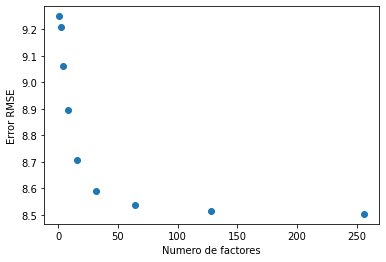

In [ ]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

- aqui a medida que aumenta el numero de factores disminuye el error rmse, hasta 50 aproximadamente decrece y luego a medida que aumentan los numeros de factores la disminucion del error es minima.


 GridSearchCV informa la métrica de precisión sobre un procedimiento de validación cruzada para un conjunto de parámetros dado. Si desea saber qué combinación de parámetros produce los mejores resultados usamos esta clase.prueba exhaustivamente todas las combinaciones de parámetros e informa los mejores parámetros para cualquier medida de precisión: Utilizaremos:
* n_factors : el número de factores. El valor predeterminado es 100.
* n_epochs : el número de iteraciones del procedimiento SGD. El valor predeterminado es 20.
* lr_all : la tasa de aprendizaje de todos los parámetros. El valor predeterminado es 0.005.

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

In [ ]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

8.430667792844623
{'n_factors': 50, 'n_epochs': 5, 'lr_all': 0.001, 'reg_all': 0.02}


Para hacer que el modelo sea generalizable, es decir, evitar el sobreajuste y el desajuste, el algoritmo de GridSearchCV resulta óptimo un n_factors = 100 

In [ ]:
algo = SVD(n_factors=50, n_epochs=5, lr_all=0.001, reg_all=0.02)
cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
np.mean(cv['test_rmse'])

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    8.4258  8.4609  8.4084  8.4317  0.0218  
Fit time          3.36    3.53    3.50    3.46    0.08    
Test time         1.91    2.08    1.55    1.85    0.22    


8.43169342064852

### Reentrenamos el modelo y medimos las recomendaciones

In [ ]:
reader = Reader(rating_scale=(1, 100))
data = Dataset.load_from_df(df3[['username', 'product_id', 'metascore']], reader)
trainset, testset = train_test_split(data, test_size=.25)

In [ ]:
algo = SVD(n_factors=100, n_epochs=5, lr_all=0.001, reg_all=0.02)
algo.fit(trainset)
predictions = algo.test(testset)

In [ ]:
from surprise import accuracy

rmse_svd_gs = accuracy.rmse(predictions)

RMSE: 8.3839


In [ ]:
usuario = '123'
df_user = df3[(df3['username'] == usuario) & (df3['metascore'] >= 80.0)]
df_user = df_user.reset_index(drop=True)
df_user.head()
recomendaciones_usuario = df_user[['title','product_id']].iloc[:4499].copy()
recomendaciones_usuario.index = recomendaciones_usuario.product_id
recomendaciones_usuario = recomendaciones_usuario.drop(['product_id'], axis=1)
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(25, 1)


,title
product_id,
-26,Grand Theft Auto V
104,Deus Ex: Mankind Divided
-120,Trine 2: Complete Story
98,TEKKEN 7
-8,Nuclear Throne


In [ ]:
usuario_vistas = df3[['username', 'product_id', 'metascore']][df3['username'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(105, 3)


,username,product_id,metascore
2340,123,-26,96
6785,123,104,83
11684,123,-120,84
15622,123,68,76
18899,123,98,82


In [ ]:
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,product_id,title
0,-26,Grand Theft Auto V
1,104,Deus Ex: Mankind Divided
2,-120,Trine 2: Complete Story
3,98,TEKKEN 7
4,-8,Nuclear Throne


In [ ]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['product_id'].apply(lambda x: algo.predict(usuario, x).est)
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head(10)

,product_id,title,Estimate_Score
0,-26,Grand Theft Auto V,89.369451
8,-72,Team Fortress 2,86.322299
18,36,Dying Light,83.376742
15,-42,The Stanley Parable,83.081656
10,-16,Counter-Strike: Source,82.937309
11,-16,Counter-Strike: Source,82.937309
9,110,Cuphead,82.499980
6,92,Bastion,82.367068
14,50,Battlerite,80.851032
7,72,Fallout 4,80.752361


In [ ]:
rmse_svd_gs=accuracy.rmse(predictions)

RMSE: 8.4711


Es un poco mejor que el svd con los parametros por default.

Haremos una funcion de que devuelva el top 10 de recomendaciones para los usuarios.

In [ ]:
# Limitamos la data a 10000 debido a que no se puede procesar tanta informacion ni en colab ni en entorno local de jupyter
reader = Reader(rating_scale=(1, 100))
data = Dataset.load_from_df(df3[['username', 'product_id', 'metascore']][:10000], reader)
trainset, testset = train_test_split(data, test_size=.25)

In [ ]:
from surprise import SVD

algo = SVD(n_factors=100, n_epochs=5, lr_all=0.001, reg_all=0.02)
algo.fit(trainset)
predictions = algo.test(testset)

In [ ]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    """Devuelve la recomendación top-N para cada usuario de un conjunto de predicciones.

     Args:
         predicciones (lista de objetos de predicción): la lista de predicciones, como
             devuelto por el método de prueba de un algoritmo.
         n (int): el número de recomendaciones a generar para cada usuario. Default
             es 10.

     Return:
     Un diccionario donde las Keys son identificadores de usuario (sin formato) y los valores son listas de tuplas:
         [(ID de artículo sin procesar, estimación de calificación), ...] de tamaño n.
    """

    # primero mapea las predicciones para cada usuario.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # luego ordena las predicciones para cada usuario y recupera el k mas alto 
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)



In [ ]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

In [ ]:
def rmse_vs_factors(algorithm, data):
  """Devuelve: rmse_algorithm, es decir, una lista de RMSE medio de CV = 5 en cross_validate () para cada factor k en el rango (1, 101, 1)
   100 valores
   Arg: i.) Algoritmo = algoritmo de factorización de matriz, por ejemplo, SVD / NMF / PMF, ii.) Datos = surprice.dataset.DatasetAutoFolds
  """
  
  rmse_algorithm = []
  
  for k in range(1, 101, 1):
    algo = algorithm(n_factors = k)
    
    #["test_rmse"] is a numpy array with min accuracy value for each testset
    loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
    rmse_algorithm.append(loss_fce)
  
  return rmse_algorithm

In [ ]:
rmse_svd = rmse_vs_factors(SVD,data)

In [ ]:
def plot_rmse(rmse, algorithm):
  """Returns: sub plots (2x1) de rmse contra number of factors. 
     La línea vertical en la segunda subplot identifica el argumento de RMSE mínimo
    
     Arg: i.) rmse = list of mean RMSE returned by rmse_vs_factors(), ii.) algorithm = STRING! of algo 
  """
  
  plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.subplot(2,1,1)
  plt.plot(rmse)
  plt.xlim(0,100)
  plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 20 )
  plt.ylabel("Mean RMSE (cv=5)")

  plt.subplot(2,1,2)
  plt.plot(rmse)
  plt.xlim(0,50)
  plt.xticks(np.arange(0, 52, step=2))

  plt.xlabel("{0}(n_factor = k)".format(algorithm))
  plt.ylabel("Mean RMSE (cv=5)")
  plt.axvline(np.argmin(rmse), color = "r")

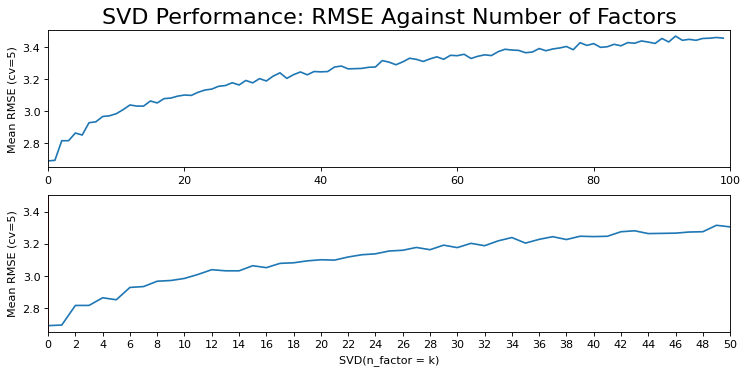

In [ ]:
plot_rmse(rmse_svd,"SVD")

A medida que aumenta el numero de factores aumenta el rmse, de forma decreciente, lo que indica que debemos usar un numero de factores bajo sin que cause overfitting..

Crearemos un anti_set, que consiste de los pares de usuarios y juegos que no existen en el dataset original. Este es el set en el cual desemos predecir los metascores.

Para predecir valores, es decir, calificaciones, para cada elemento vacío, en la matriz de utilidad, es esencial especificar: a.) los usuarios y b.) juegos particulares que no están en el train. El metodo build_anti_testset() de trainset logra la meta.

In [ ]:
algo_SVD = SVD(n_factors=100, n_epochs=5, lr_all=0.001, reg_all=0.02)
algo_SVD.fit(trainset)


# Predict ratings for all pairs (i,j) that are NOT in the training set.
testset = trainset.build_anti_testset()

predictions = algo_SVD.test(testset)

# subset of the list  predictions
predictions[0:2]

[Prediction(uid='NO More CSGO :| B4TM4n_iAx', iid=6, r_ui=87.8012, est=87.97744338486453, details={'was_impossible': False}),
 Prediction(uid='NO More CSGO :| B4TM4n_iAx', iid=104, r_ui=87.8012, est=83.12387154548539, details={'was_impossible': False})]

## Modelos de Filtrado Colaborativo

In [ ]:
# Importamos las librerias basicas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos el dataset modificado
df3 = pd.read_csv('/content/drive/MyDrive/data science/sprint project 3/df3.csv')

In [ ]:
# Importamos librerias
!pip install surprise

     |████████████████████████████████| 11.8 MB 4.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619408 sha256=9f9b7c324fa583a29a1fe098c308c9cc4fc6a46a15ac6f3e0fcdbf71454fad0d
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Importamos modulos
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline

In [ ]:
# Limitamos la data a 10000 debido a que no se puede procesar tanta informacion ni en colab ni en entorno local de jupyter
reader = Reader(rating_scale=(1, 100))
data = Dataset.load_from_df(df3[['username', 'product_id', 'metascore']][:10000], reader)
trainset, testset = train_test_split(data, test_size=.25)

### Modelo KNNBasic()

In [ ]:
# Entrenamos un modelo de KNNBasic(), con sus hiperparametros por defecto
kf = KFold(n_splits=3)
algo = KNNBasic()
best_algo = None
best_rmse = 10.0
best_pred = None
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse_knn_basic = accuracy.rmse(predictions, verbose=True)
    if rmse_knn_basic < best_rmse:
        best_algo = algo
        best_pred = predictions
        best_rmse= rmse_knn_basic
rmse_knn_basic
print(best_rmse)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 9.1204
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 9.0489
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 9.3840
9.048888554535813


### Modelo KNNWithMeans()

In [ ]:
# Entrenamos un modelo de KNNWithMeans(), con sus hiperparametros de opcion de similitud coseno y calcula similitudes entre usuarios
kf = KFold(n_splits=3)
kf = KFold(n_splits=5)
sim_options = {'name':'cosine'}
algo = KNNWithMeans(sim_options = sim_options)
best_algo = None
best_rmse = 10.0
best_pred = None
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)    
    rmse_knn_km = accuracy.rmse(predictions, verbose=True)
    if rmse_knn_km < best_rmse:
        best_algo = algo
        best_rmse= rmse_knn_km
        best_pred = predictions
rmse_knn_km
print(best_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 9.0434
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 9.3768
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 9.1685
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 9.1767
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 9.3551
9.04341721631462


In [ ]:
# Entrenamos un modelo de KNNWithMeans(), usando el hiperparametro de opcion de similitud de coseno y calcula similitudes entre items
sim_options = {'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNWithMeans(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 10.0
best_pred = None
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse_knn_kmcos = accuracy.rmse(predictions, verbose=True)
    if rmse_knn_kmcos < best_rmse:
        best_rmse= rmse_knn_kmcos
        best_algo = algo
        best_pred = predictions
rmse_knn_kmcos
print(best_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 9.0942
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 9.2521
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 8.8378
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 9.1328
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 9.1290
8.837816091030955


In [ ]:
# Entrenamos un modelo de KNNBaseline(), usando el hiperparametro de opcion de similitud de coseno y calcula similitudes entre USERS
kf = KFold(n_splits=5)
algo = KNNBaseline(k =3 , sim_options = {'name': 'cosine'})
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse_knn_base = accuracy.rmse(predictions, verbose=True)
    if rmse_knn_base < best_rmse:
        best_rmse = rmse_knn_base
        best_algo = algo
        best_pred = predictions
        
rmse_knn_base   
print(best_rmse)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.9291
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.0136
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.8887
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.7414
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.6970
2.6969573746536337


### Gridsearch KNN

In [ ]:
param_grid = {'n_factors': [5,50,100],'n_epochs': [5,10,20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

2.964411267705376
{'n_factors': 5, 'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.002}


In [ ]:
param_grid = {'n_factors': [5,50,100],'n_epochs': [5,10,20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

9.173993130626178
{'n_factors': 5, 'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.002}


In [ ]:
param_grid = {'n_factors': [5,50,100],'n_epochs': [5,10,20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

9.228100217569946
{'n_factors': 5, 'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.002}


In [ ]:
# Usar parámetros del gridsearch para KNNBaseline, ya que KNNWithMeans, obtuvo un rendimiento menor
kf = KFold(n_splits=5)
algo = KNNBaseline(k =3 , n_factors = 5, n_epochs = 5, lr_all = 0.002, reg_all = 0.002, sim_options = {'name': 'cosine'})
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse_knn_base_gs = accuracy.rmse(predictions, verbose=True)
    if rmse_knn_base_gs < best_rmse:
        best_rmse = rmse_knn_base_gs
        best_algo = algo
        best_pred = predictions
        
rmse_knn_base_gs   
print(best_rmse)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.8206
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.6344
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.0210
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.8096
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.0812
2.6343868087053215


obtuvimos un excelente rmse.

## Crearemos un anti_set.
que consiste de los pares de usuarios y juegos que no existen en el dataset original. Este es el set en el cual desemos predecir los metascores.

In [ ]:
# Limitamos la data a 10000 debido a que no se puede procesar tanta informacion ni en colab ni en entorno local de jupyter
reader = Reader(rating_scale=(1, 100))
data_final = Dataset.load_from_df(df3[['username', 'product_id', 'metascore']][:10000], reader)
anti_set = data.build_full_trainset().build_anti_testset()

Lo normal para el antiset es que genere para cada usuario o juego faltante, un metascore promedio correspondiente

In [ ]:
games = df3[['product_id' , 'title']].drop_duplicates(['product_id' , 'title'])
users = df3[['username']].drop_duplicates(['username'])

### Predicciones para datos que se encuentran en el training set

In [ ]:
pred_df = pd.DataFrame(best_pred).merge(df3 , left_on = ['uid', 'iid'], right_on = ['username', 'product_id'])
pred_df[['uid', 'iid',  'username', 'title', 'product_id', 'est','metascore']]

,uid,iid,username,title,product_id,est,metascore
0,duckman,54,duckman,Far Cry 3 - Blood Dragon,54,79.788771,81
1,toppy,104,toppy,Deus Ex: Mankind Divided,104,83.061746,83
2,Zakis,104,Zakis,Deus Ex: Mankind Divided,104,83.061746,83
3,Luparim,104,Luparim,Deus Ex: Mankind Divided,104,83.061746,83
4,Professor Octagon,-26,Professor Octagon,Grand Theft Auto V,-26,95.973439,96
...,...,...,...,...,...,...,...
2104,RogueTrip,22,RogueTrip,Need for Speed Undercover,22,67.679313,65
2105,Fleshmeister,72,Fleshmeister,LawBreakers,72,74.211451,76
2106,LarryPinhead,54,LarryPinhead,Far Cry 3 - Blood Dragon,54,79.788771,81
2107,Nico Robin (Inf),-26,Nico Robin (Inf),Grand Theft Auto V,-26,95.973439,96


### Predicciones para datos que no se encuentran en el training set

In [ ]:
anti_pre = best_algo.test(anti_set)
pred_df = pd.DataFrame(anti_pre).merge(games , left_on = ['iid'], right_on = ['product_id'])
pred_df = pd.DataFrame(pred_df).merge(users , left_on = ['uid'], right_on = ['username'])

In [ ]:
pred_df[(pred_df['est']>70.0)&(pred_df['username']=='anotherphysicsgradstudent')].head()

,uid,iid,r_ui,est,details,product_id,title,username
2445,anotherphysicsgradstudent,72,87.8244,74.475672,"{'actual_k': 0, 'was_impossible': False}",72,Back to Bed,anotherphysicsgradstudent
2446,anotherphysicsgradstudent,72,87.8244,74.475672,"{'actual_k': 0, 'was_impossible': False}",72,LawBreakers,anotherphysicsgradstudent
2447,anotherphysicsgradstudent,72,87.8244,74.475672,"{'actual_k': 0, 'was_impossible': False}",72,DOOM,anotherphysicsgradstudent
2448,anotherphysicsgradstudent,72,87.8244,74.475672,"{'actual_k': 0, 'was_impossible': False}",72,Command &amp; Conquer: Red Alert 3,anotherphysicsgradstudent
2449,anotherphysicsgradstudent,72,87.8244,74.475672,"{'actual_k': 0, 'was_impossible': False}",72,F1 2011,anotherphysicsgradstudent


In [ ]:
pred_df['username'].value_counts()

pharmgrinder      836
kalirion          836
[F!] Aldershot    836
要你命3000           836
Inle              836
                 ... 
Mr. Matt          785
Max               784
Big Boss          776
Chris             775
Tim               768
Name: username, Length: 9685, dtype: int64

In [ ]:
pred_df['username'].value_counts().unique()

array([836, 835, 834, 833, 831, 830, 829, 828, 827, 826, 825, 824, 823,
       822, 821, 819, 818, 817, 815, 814, 813, 812, 811, 810, 809, 808,
       807, 806, 805, 804, 803, 802, 801, 800, 799, 798, 797, 796, 795,
       793, 792, 790, 788, 787, 785, 784, 776, 775, 768])

### Comparando resultados de SVD con KNN, de forma gráfica

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

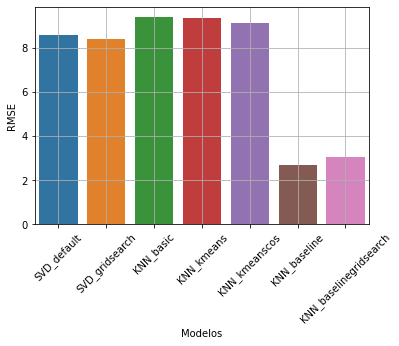

In [ ]:
errores = {
    'Modelos': ['SVD_default', 'SVD_gridsearch', 'KNN_basic', 'KNN_kmeans', 'KNN_kmeanscos', 'KNN_baseline','KNN_baselinegridsearch'],
    
    'RMSE': [rmse_svd_d, rmse_svd_gs, rmse_knn_basic, rmse_knn_km, rmse_knn_kmcos ,rmse_knn_base, rmse_knn_base_gs]}

tabla_errores = pd.DataFrame(errores, columns = ['Modelos', 'RMSE'])

sns.barplot(x = 'Modelos', y = 'RMSE', data = tabla_errores)
plt.grid('y')
plt.xticks(rotation = 45)

## Conclusion:
Concluimos que el modelo mas performante y que cumple con filtro colaborativo fue:
KNNBaseline: KNNBaseline(k =3 , n_factors = 5, n_epochs = 5, lr_all = 0.002, reg_all = 0.002, sim_options = {'name': 'cosine'}) ya que obtuvo un rmse de 2.63)

# Parte C - Investigación
## Plantea nuevas preguntas en base al trabajo que hiciste y en las que se pueda ahondar
- Confeccionar un sistema para un usuario que recién ingresa a la plataforma y no conocemos sus preferencias, usuario cold start.

## Plantea un flujo de trabajo que responda alguna o algunas de esas preguntas
- Probar un modelo con usuarios nuevos y ver su comportamiento, es decir un usuario que esté en test y no en train, la predicciones tendrían que ser malas. Podríamos probar recomendarles a los usuarios nuevos los juegos más populares y de acuerdo a si eligen uno de los recomendados, se lo puede considerar que lo han calificado positivo, y utilizar esa información para retroalimentar al modelo y volverle a recomendar nuevos juegos

## Requerimientos Adicionales
- Implementa el flujo de trabajo planteado
Tabla de contenidos

## Cold Start:
Sistema de recomendación Basado en Popularidad para los usuarios nuevos a la plataforma.

Para los nuevos usuarios de la plataforma de Steam, no conocemos sus preferencias, deberemos ofrecerles los juegos más populares, con mas horas jugadas según los usuarios previos. 


In [ ]:
# Total de número de horas y total de número de usuarios por juego
user_count = df3.groupby('app_name')['username'].agg('count').sort_values(ascending=False) 

hours_played = df3.groupby('app_name')['hours'].agg(np.sum).sort_values(ascending=False) 

In [ ]:
# Creamos el dataframe con los más jugados con el total de horas y total de usuarios por juego    
nb_games=10
df_top_hours_played = pd.DataFrame({'top_game': hours_played.index,
                                    'hours_played': hours_played.values,
                                    'user_count': user_count.values})[0:nb_games]

In [ ]:
df_top_hours_played

,top_game,hours_played,user_count
0,Team Fortress 2,573647,11605
1,Borderlands 2,283037,5574
2,Fallout 4,266503,5345
3,Grand Theft Auto V,225612,5306
4,Starbound,178022,4707
5,Warframe,170398,4026
6,Undertale,148344,3534
7,Portal 2,144052,3242
8,Sid Meier's Civilization® V,141004,2856
9,Mount & Blade: Warband,133806,2829


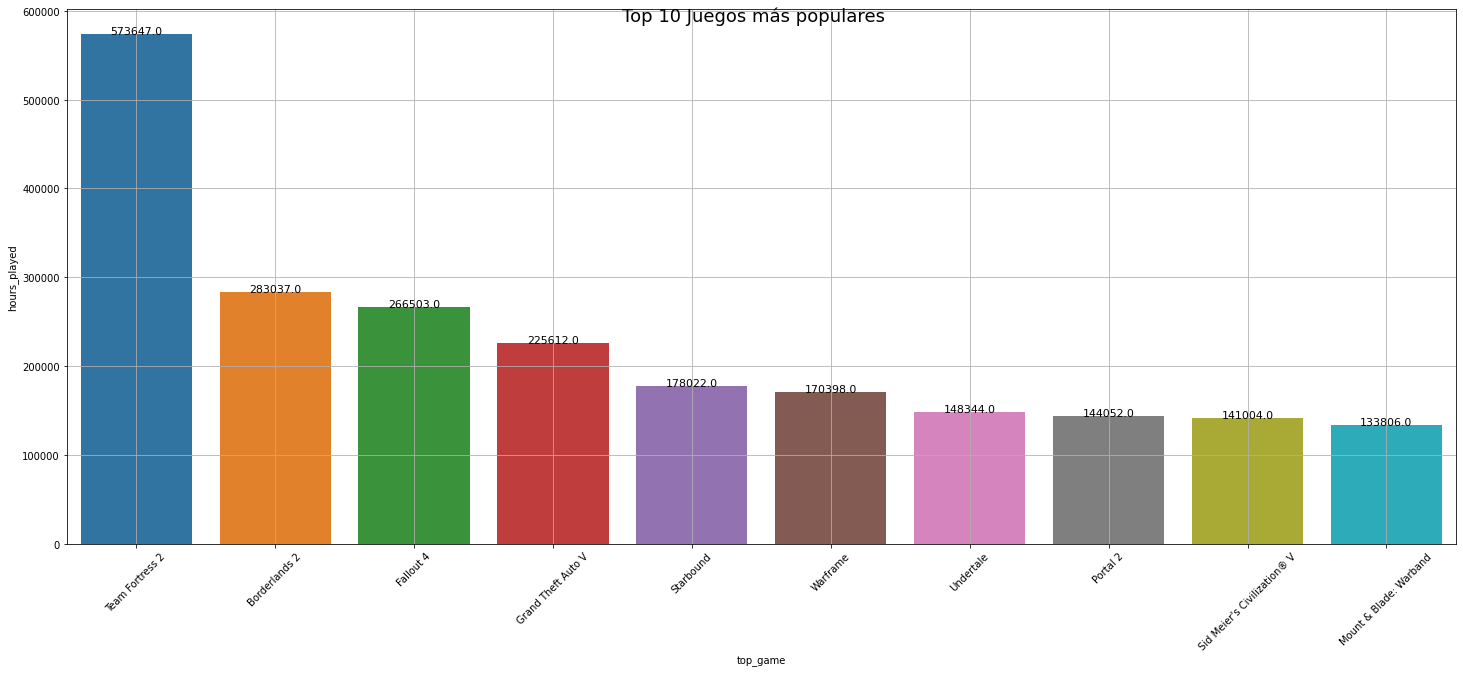

In [ ]:
## creamos la figura con subplots de 1 linea 2 columnas
fig, axes = plt.subplots(1,1, figsize=(20, 8))
fig.suptitle('Top 10 Juegos más populares', fontsize=18)
fig.tight_layout(pad=1.0)
sns.barplot(x="top_game", y="hours_played", ax=axes,orient="v", data=df_top_hours_played)
plt.sca(axes)
plt.xticks(rotation=45)
plt.grid()

for rect in axes.patches:
    axes.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

# Conclusiones
Pudimos confeccionar un sistema de recomendacion y mostrarles a los ususarios las recomendaciones producidas con sistema de  filtrado colaborativo con knnbasic, ya que fue el que mejor performance obtuvimos. Para un usuario que recien ingresa al sistema mostrandoles los juegos mas populares y una vez que elija ingresa al sistema. 
Si bien no fue posible procesar todo el conjunto por el consumo de memoria ram al intentar procesar los datos  de datos ya que lo limitamos a 10.000, a fin de poder procesar todo, aun asi considero que se pudo producir un buen sistema de recomendacion al que deberia luego ser procesado con toda la matriz. 